In [ ]:
# prompt: upload pdf

from google.colab import files
uploaded = files.upload()


Saving BridgeStat_January2015_FINAL.pdf to BridgeStat_January2015_FINAL.pdf


In [ ]:
# Install necessary packages
!apt-get install -y poppler-utils  # Installs pdftoppm
!apt-get install -y tesseract-ocr  # Installs Tesseract OCR
!pip install pytesseract pdf2image  # Installs pytesseract and pdf2image

import pytesseract
from pdf2image import convert_from_path
from PIL import Image
import os

# Function to extract text from a PDF file using Tesseract OCR
def extract_text_from_pdf(pdf_path):
    """Extracts text from a PDF file using Tesseract OCR.

    Args:
        pdf_path (str): The path to the PDF file.

    Returns:
        str: A string containing the extracted text.
    """
    try:
        # Convert PDF pages to images
        images = convert_from_path(pdf_path)

        # Iterate through images and extract text using Tesseract
        extracted_text = ""
        for i, image in enumerate(images):
            # Save the image as a temporary file to pass to Tesseract
            temp_image_path = f"temp_page_{i}.png"
            image.save(temp_image_path, 'PNG')

            # Use Tesseract to extract text from the image
            text = pytesseract.image_to_string(Image.open(temp_image_path))
            extracted_text += text

            # Remove the temporary image file
            os.remove(temp_image_path)

        return extracted_text

    except Exception as e:
        print(f"Error extracting text from PDF: {e}")
        return None


# If running in a Colab environment, use files.upload() to upload files
from google.colab import files

# Upload PDF files
uploaded = files.upload()

# Loop through uploaded files and extract text
for fn in uploaded.keys():
    if fn.endswith(".pdf"):
        try:
            # Extract text from the uploaded PDF file
            text = extract_text_from_pdf(fn)
            if text:
                print(f"Extracted text from {fn}:\n{text[:1000]}")  # Print the first 1000 characters
        except Exception as e:
            print(f"Error processing {fn}: {e}")


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 186 kB of archives.
After this operation, 696 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.5 [186 kB]
Fetched 186 kB in 0s (776 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 123667 files and directories currently installed.)
Preparing to unpack .../poppler-utils_22.02.0-2ubuntu0.5_amd64.deb ...
Unpacking poppler-utils (22.02.0-2ubuntu0.5) ...
Setting up poppler-utils (22.02.0-2ubuntu0.5) ...
Processing triggers for man-db (2.10.2-1) ...
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed

Saving BridgeStat_January2015_FINAL.pdf to BridgeStat_January2015_FINAL (1).pdf
Extracted text from BridgeStat_January2015_FINAL (1).pdf:
   

er csi

Ce
Cambridge Police Department

Byalefxoh ies

January 2015

Produced by the Crime Analysis Unit
ig

A
©:

(0 fo [Ay fo | p>

Part | Total Crime

A review of serious crime statistics for the first month of 2015 (through
February 2") indicates that a 10% increase in the Part One index total has
been recorded. During January of this year, there were 199 serious crimes
reported in Cambridge. For the same time period in 2014, the combined total
for Murder, Rape, Robbery, Aggravated Assault, Burglary, Larceny & Auto theft
was 181 incidents, 18 fewer than this year.

 

i

=
[= a)

Further analysis of the crime totals for the first month of 2015 reveals that
LC) while violent crimes registered a 35% decrease to start the year, property
AS) crimes rose 17% with 27 additional crimes reported when compared with

January of 2014. The majority of 

TypeError: 'value' must be an instance of str or bytes, not a int

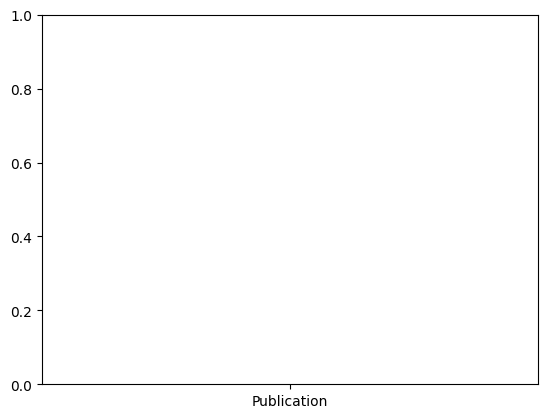

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

def scrape_website(url):
    """Scrapes a website for text content."""
    try:
        response = requests.get(url)
        response.raise_for_status()  # Raise an exception for bad status codes
        soup = BeautifulSoup(response.content, 'html.parser')
        text = soup.get_text()
        return text
    except requests.exceptions.RequestException as e:
        print(f"Error scraping website: {e}")
        return None

def analyze_text(text, keywords):
    """Analyzes text for keyword frequency and sentiment."""
    keyword_counts = {keyword: text.lower().count(keyword.lower()) for keyword in keywords}
    return keyword_counts

def create_bar_graph(data, title):
    """Creates a bar graph from data."""
    if isinstance(data, pd.Series):
        data = data.to_dict()  # Convert to dictionary if data is a Series
    plt.bar(data.keys(), data.values())
    plt.title(title)
    plt.xlabel("Keywords")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Example usage:
urls = [
    "https://www.cambridgema.gov/-/media/Files/policedepartment/BridgeStat/BridgeStat_August2014_FINAL.pdf",  # Replace with actual URLs related to ShotSpotter
    # Add more URLs as needed
]

keywords = ["ShotSpotter", "Privacy", "Transparency", "Effective", "Reliability",
            "Urban areas", "Gentrification", "Inaccurate"]

all_data = []

for url in urls:
    text = scrape_website(url)
    if text:
        keyword_counts = analyze_text(text, keywords)
        # Extract year and publication information (customize as needed)
        year = 2023  # Replace with actual year extraction logic
        publication = "Example Publication"  # Replace with actual publication name
        all_data.append({"Year": year, "Publication": publication, **keyword_counts})

df = pd.DataFrame(all_data)

# Analyze changes in discussion over time
# Group by year and aggregate keyword frequencies
yearly_counts = df.groupby("Year").sum()

# Ensure the data being passed is a Series and not a numpy array
create_bar_graph(yearly_counts.loc[2023], "Keyword Frequency in 2023")  # Example for 2023

print("Frequency of Mentions Table:")
print(yearly_counts)
